*****Running with user-defined parameters:*****
 {
data_to_visualize:regressor_cifar_test_output.pth
dataset_opts:
  {
  dataset:cifar10
  train:False
  }
}

Files already downloaded and verified
On manifold histogram


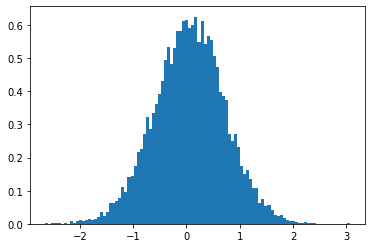

Off manifold histogram


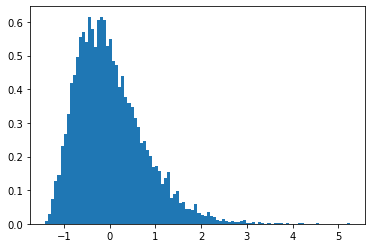

On manifold
Top all ims


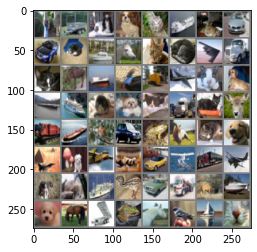

Bottom all ims


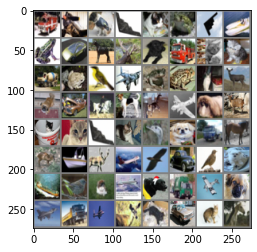

Off manifold
Top all ims


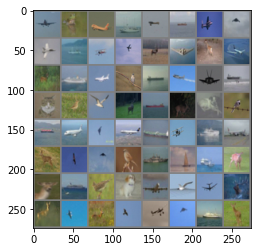

Bottom all ims


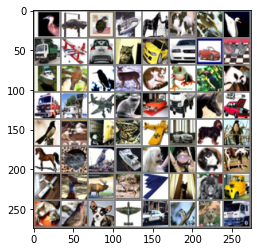

Combined
Top all ims


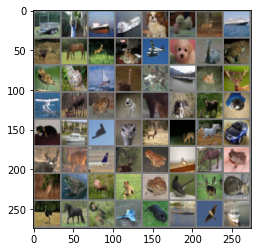

Bottom all ims


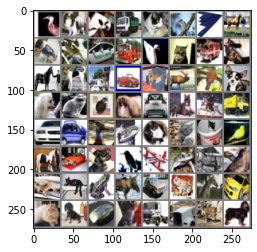

In [2]:
%run main.py --basename cifar_stylegan --mode visualize_data --parameter_key cifar_stylegan_visualize_cifar_test

*****Running with user-defined parameters:*****
 {
data_to_visualize:regressor_cifar_train_output.pth
visualize_comparison:True
comparison_data:regressor_mnist_train_output.pth
}



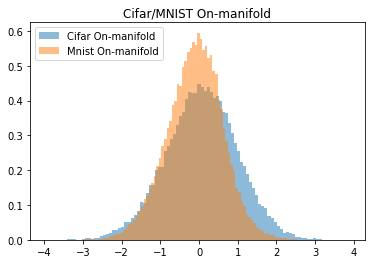

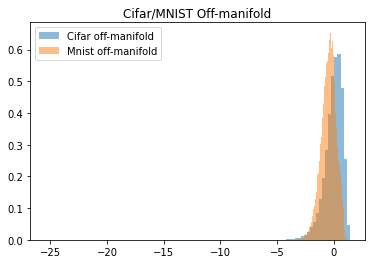

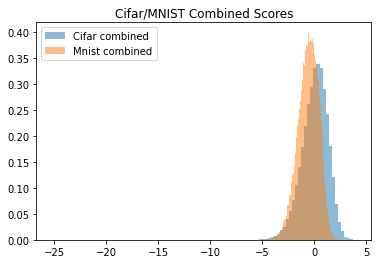

In [3]:
%run main.py --basename cifar_stylegan --mode visualize_data --parameter_key cifar_stylegan_compare

*****Running with user-defined parameters:*****
 {
data_to_visualize:regressor_cifar_train_output.pth
visualize_comparison:True
comparison_data:regressor_cifar100_train_output.pth
}



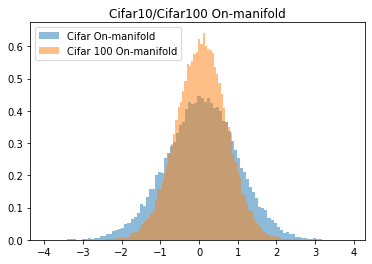

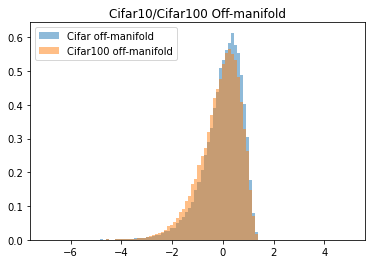

In [1]:
%run main.py --basename cifar_stylegan --mode visualize_data --parameter_key cifar_stylegan_cifar100_compare

*****Running with user-defined parameters:*****
 {
data_to_visualize:regressor_cifar_test_output.pth
visualize_comparison:True
comparison_data:regressor_cifar100_test_output.pth
}



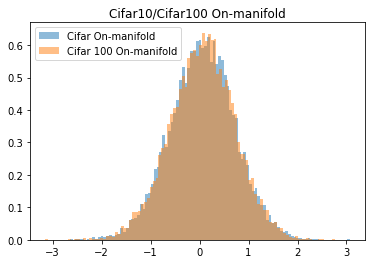

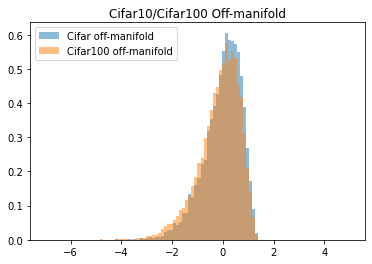

In [2]:
%run main.py --basename cifar_stylegan --mode visualize_data --parameter_key cifar_stylegan_cifar100_compare_test

In [1]:
import torch
import torchvision



# Load cifar images into [0,1] range
dataset_folder = '/fs/vulcan-datasets/CIFAR'
im_transform = torchvision.transforms.ToTensor()
dataset = torchvision.datasets.CIFAR10(dataset_folder, train=True, transform=im_transform, target_transform=None, download=False)
dataloader =  torch.utils.data.DataLoader(dataset, 
                                          batch_size = 256, 
                                          shuffle=True,  
                                          pin_memory=True)


In [2]:


encoder = torch.nn.Linear(3072, 512).cuda()
decoder = torch.nn.Linear(512, 3072).cuda()
lossfunc = torch.nn.BCELoss()
encoder_optim = torch.optim.Adam(encoder.parameters())
decoder_optim = torch.optim.Adam(decoder.parameters())

"""
# Load cifar images into [0,1] range
dataset_folder = '/fs/vulcan-datasets/CIFAR'
im_transform = torchvision.transforms.ToTensor()
dataset = torchvision.datasets.CIFAR10(dataset_folder, train=True, transform=im_transform, target_transform=None, download=False)
dataloader =  torch.utils.data.DataLoader(dataset, 
                                          batch_size = 256, 
                                          shuffle=True,  
                                          pin_memory=True)
"""




#print(dataset[0])
#di = iter(dataloader)
#batch = next(di)
#print(batch[0].size(), batch[1].size())

# Train autoencoder via BCEloss

count = 0
for n in range(50):
    print("Epoch", n)
    for batch in dataloader:
        ims = batch[0]
        ims = ims.cuda().reshape(ims.size(0), 3072)
        
        reconstruction = torch.sigmoid(decoder(encoder(ims)))
        loss = lossfunc(reconstruction, ims)
        
        encoder.zero_grad()
        de
coder.zero_grad()
        loss.backward()
        encoder_optim.step()
        decoder_optim.step()
        
        if count%10 == 0:
            print(count, loss.item())
        count += 1

# Reshape outputs to visualize





# Visualize outputs





# then test on cifar100 images?













Epoch 0
0 0.6969274282455444
10 0.6681267023086548
20 0.6506373882293701
30 0.6395930647850037
40 0.6293326020240784
50 0.6287083625793457
60 0.6211697459220886
70 0.6160310506820679
80 0.6139810681343079
90 0.6142195463180542
100 0.611731231212616
110 0.6102281808853149
120 0.6045565605163574
130 0.600050687789917
140 0.6043667793273926
150 0.6003766059875488
160 0.6104700565338135
170 0.5980305671691895
180 0.6076654195785522
190 0.5943732857704163
Epoch 1
200 0.5941616296768188
210 0.5910536050796509
220 0.5928279757499695
230 0.6033801436424255
240 0.5991844534873962
250 0.5838753581047058
260 0.6045198440551758
270 0.600211501121521
280 0.5976409316062927
290 0.5913703441619873
300 0.5859807729721069
310 0.5863537788391113
320 0.5994400382041931
330 0.5940865874290466
340 0.5974724292755127
350 0.5861520171165466
360 0.5764298439025879
370 0.593191921710968
380 0.5849051475524902
390 0.5839210748672485
Epoch 2
400 0.5829563140869141
410 0.5858434438705444
420 0.5883920788764954
43

3420 0.5561584234237671
3430 0.5586292147636414
3440 0.5578860640525818
3450 0.5611781477928162
3460 0.5610621571540833
3470 0.5596461296081543
3480 0.5479998588562012
3490 0.5616542100906372
3500 0.5563712120056152
3510 0.5586023330688477
3520 0.5406338572502136
Epoch 18
3530 0.5446748733520508
3540 0.5553481578826904
3550 0.5540043711662292
3560 0.5593101382255554
3570 0.548322319984436
3580 0.5611652731895447
3590 0.5512284636497498
3600 0.5606133937835693
3610 0.5601375102996826
3620 0.5459285974502563
3630 0.5485239028930664
3640 0.5566315650939941
3650 0.5544445514678955
3660 0.5592210292816162
3670 0.5683035254478455
3680 0.5540656447410583
3690 0.556441068649292
3700 0.5597096681594849
3710 0.5490237474441528
3720 0.5610455870628357
Epoch 19
3730 0.5494641661643982
3740 0.5548543334007263
3750 0.5576154589653015
3760 0.561072587966919
3770 0.5645142197608948
3780 0.5488176345825195
3790 0.5745834112167358
3800 0.5606479048728943
3810 0.564215898513794
3820 0.5577365159988403
38

6790 0.5609546899795532
6800 0.5415545701980591
6810 0.5593326091766357
6820 0.5567940473556519
6830 0.5629280805587769
6840 0.5513011813163757
6850 0.5545814037322998
Epoch 35
6860 0.5849770307540894
6870 0.5640966892242432
6880 0.6491037607192993
6890 0.6711331605911255
6900 0.8361268043518066
6910 0.5835217833518982
6920 0.5725821852684021
6930 0.5747554302215576
6940 0.5590305924415588
6950 0.5596088171005249
6960 0.5635234117507935
6970 0.54887455701828
6980 0.5548728704452515
6990 0.5512709617614746
7000 0.5539252161979675
7010 0.549113392829895
7020 0.555033802986145
7030 0.5491329431533813
7040 0.5535757541656494
7050 0.5607895851135254
Epoch 36
7060 0.5586258172988892
7070 0.5561716556549072
7080 0.5602774620056152
7090 0.5607403516769409
7100 0.5458917617797852
7110 0.5549512505531311
7120 0.5605674982070923
7130 0.5533161759376526
7140 0.5577800273895264
7150 0.5612179040908813
7160 0.5541381239891052
7170 0.5589081645011902
7180 0.5554618835449219
7190 0.5483475923538208
72

torch.Size([64, 3072]) torch.Size([64, 3072])


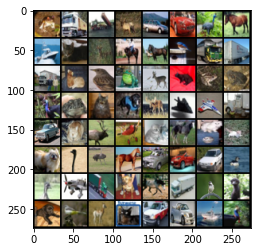

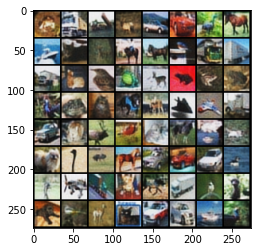

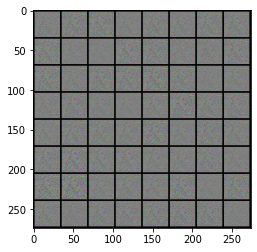

In [7]:
import numpy as np


encoder = pickle.load(open('./models/small_linear_cifar10_encoder/encoder.pkl','rb'))
decoder = pickle.load(open('./models/small_linear_cifar10_encoder/decoder.pkl','rb'))

test_dataset = torchvision.datasets.CIFAR10(dataset_folder, train=False, transform=im_transform, target_transform=None, download=False)
test_dataloader =  torch.utils.data.DataLoader(dataset, 
                                          batch_size = 64, 
                                          shuffle=False,  
                                          pin_memory=True)
batch = next(iter(test_dataloader))
ims_initial = batch[0].cuda().reshape(64,3072)
ims_final = torch.sigmoid(decoder(encoder(ims_initial)))

print(ims_initial.size(), ims_final.size())


ims_initial_grid = torchvision.utils.make_grid(ims_initial.cpu().reshape(64,3,32,32)).permute(1,2,0).numpy()
ims_final_grid = torchvision.utils.make_grid(ims_final.detach().cpu().reshape(64,3,32,32)).permute(1,2,0).numpy()


random_encoder = torch.nn.Linear(3072, 512).cuda()
random_decoder = torch.nn.Linear(512, 3072).cuda()
ims_random = torch.sigmoid(random_decoder(random_encoder(ims_initial)))
ims_random_grid = torchvision.utils.make_grid(ims_random.detach().cpu().reshape(64,3,32,32)).permute(1,2,0).numpy()

import matplotlib.pyplot as plt
plt.imshow(ims_initial_grid)
plt.show()
plt.imshow(ims_final_grid)
plt.show()
plt.imshow(ims_random_grid)
plt.show()

torch.Size([64, 3072]) torch.Size([64, 3072])


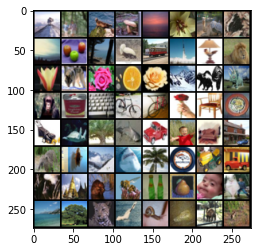

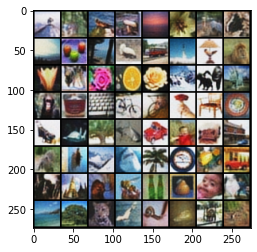

In [8]:
cifar100_test = torchvision.datasets.CIFAR100('/fs/vulcan-datasets/', train=False, transform=im_transform)
cifar100_test_loader =  torch.utils.data.DataLoader(cifar100_test, 
                                          batch_size = 64, 
                                          shuffle=False,  
                                          pin_memory=True)
batch = next(iter(cifar100_test_loader))
ims_initial = batch[0].cuda().reshape(64,3072)
ims_final = torch.sigmoid(decoder(encoder(ims_initial)))

print(ims_initial.size(), ims_final.size())


ims_initial_grid = torchvision.utils.make_grid(ims_initial.cpu().reshape(64,3,32,32)).permute(1,2,0).numpy()
ims_final_grid = torchvision.utils.make_grid(ims_final.detach().cpu().reshape(64,3,32,32)).permute(1,2,0).numpy()



import matplotlib.pyplot as plt
plt.imshow(ims_initial_grid)
plt.show()
plt.imshow(ims_final_grid)
plt.show()

torch.Size([64, 3072]) torch.Size([64, 3072])


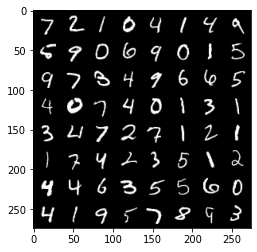

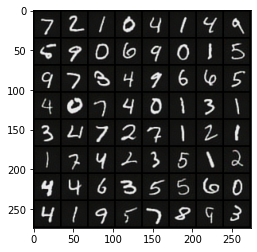

In [9]:
def colorize(t):
    return torch.stack([t,t,t])
    

mnist_transform = torchvision.transforms.Compose([torchvision.transforms.Pad(2),torchvision.transforms.ToTensor(),colorize])
mnist_test = torchvision.datasets.MNIST('/cfarhomes/krusinga/storage/datasets/', train=False, transform=mnist_transform)
mnist_test_loader =  torch.utils.data.DataLoader(mnist_test, 
                                          batch_size = 64, 
                                          shuffle=False,  
                                          pin_memory=True)
batch = next(iter(mnist_test_loader))
ims_initial = batch[0].cuda().reshape(64,3072)
ims_final = torch.sigmoid(decoder(encoder(ims_initial)))

print(ims_initial.size(), ims_final.size())


ims_initial_grid = torchvision.utils.make_grid(ims_initial.cpu().reshape(64,3,32,32)).permute(1,2,0).numpy()
ims_final_grid = torchvision.utils.make_grid(ims_final.detach().cpu().reshape(64,3,32,32)).permute(1,2,0).numpy()



import matplotlib.pyplot as plt
plt.imshow(ims_initial_grid)
plt.show()
plt.imshow(ims_final_grid)
plt.show()

In [19]:
!ls

build_models.py     model_functions.py	     stylegan_commands.txt
config.py	    models		     tensorboard
datasets.py	    models.py		     TODO.txt
dnnlib		    performance_tracking.py  torch_utils
examples	    __pycache__		     train.py
folder_config.json  README.md		     utils.py
generated	    requirements.txt	     visualize.py
jupyter_view.ipynb  saved_parameters.json    workspace_setup.sh
logs		    srun_scripts
main.py		    stylegan3


In [3]:
import pickle
pickle.dump(encoder,open('./models/small_linear_cifar10_encoder/encoder.pkl','wb'))
pickle.dump(decoder,open('./models/small_linear_cifar10_encoder/decoder.pkl','wb'))

In [21]:
!ls models

cifar_stylegan	small_linear_cifar10_encoder


In [22]:
!pwd

/cfarhomes/krusinga/arlis-domain-shift


torch.Size([50000, 512])
torch.Size([50000, 3, 32, 32])
torch.Size([50000, 512])
Linear(in_features=512, out_features=3072, bias=True)


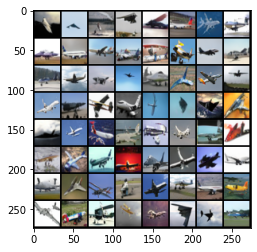

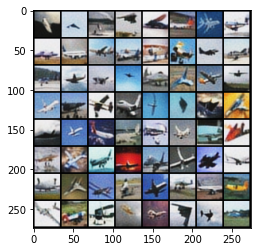

In [1]:
%run main.py --mode custom --custom_func view_samples

loading


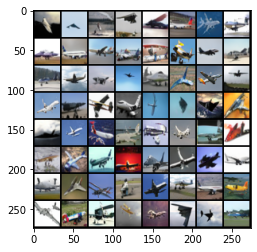

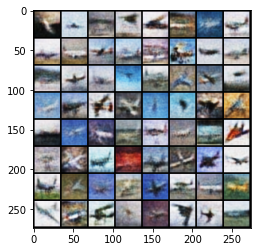

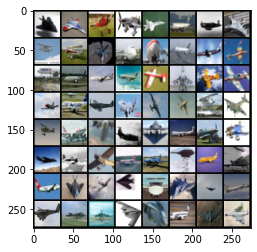

Opening pretrained stylegan2
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


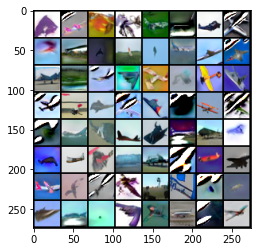

In [1]:
%run main.py --mode custom --custom_func show_bidirectional_results

Total logprob histograms reverse (z to e)


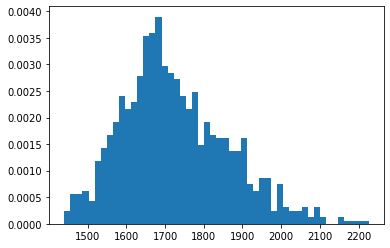

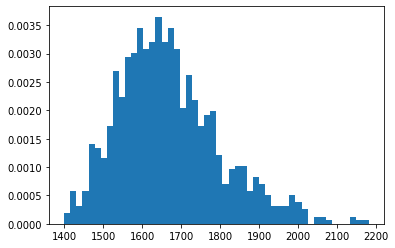

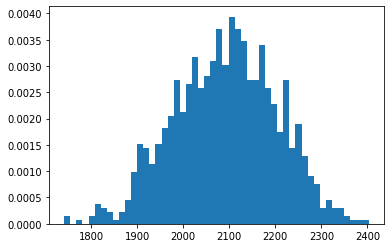

Reconstruction losses histograms


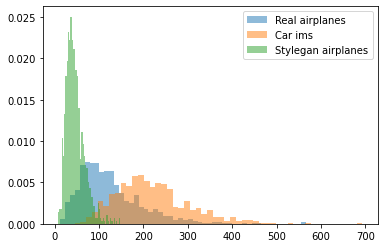

In [1]:
%run main.py --mode custom --custom_func view_jacobian_histogram

loading


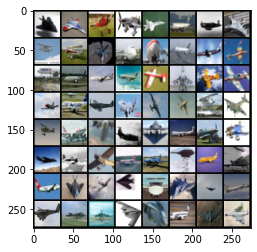

Opening pretrained stylegan2
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


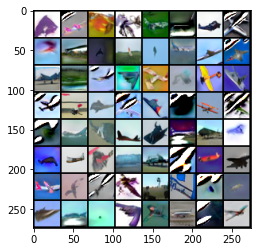

In [1]:
%run main.py --mode custom --custom_func show_bidirectional_results

Opening pretrained stylegan2
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
real


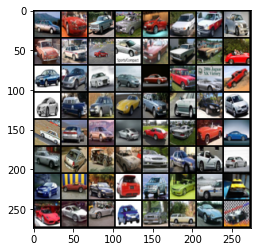

real2stylegan


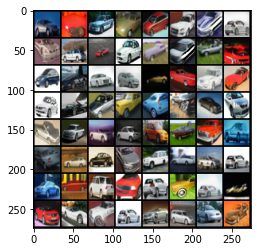

stylegan2real


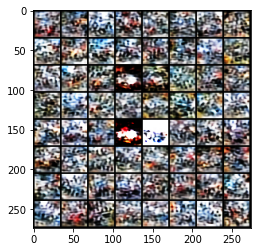

stylegan


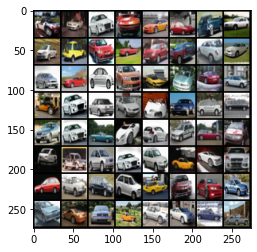

In [1]:
%run autoencoder_method.py